In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from surprise import KNNBasic
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise import NMF
from surprise import SVD
import os
from collections import defaultdict
from collections import namedtuple
import sys
import os
import zipfile
import itertools
import random
from surprise import accuracy
from surprise.model_selection import KFold
from collections import Counter

import numpy as np

from surprise import BaselineOnly
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

import pandas as pd

from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

#metrics, accuracy, roc and confusion matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn import metrics
import itertools
from surprise.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
print('uesed')

uesed


In [3]:
movie_cols = ['Movie_id', 'title', 'genres']
movies = pd.read_csv(r'C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\movies.csv')
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [4]:
ratings_cols = ['Movie_id', 'title', 'genres']
ratings = pd.read_csv(r'C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\ratings.csv')
print(ratings)

        userId  movieId  rating   timestamp
0            1       31     2.5  1260759144
1            1     1029     3.0  1260759179
2            1     1061     3.0  1260759182
3            1     1129     2.0  1260759185
4            1     1172     4.0  1260759205
5            1     1263     2.0  1260759151
6            1     1287     2.0  1260759187
7            1     1293     2.0  1260759148
8            1     1339     3.5  1260759125
9            1     1343     2.0  1260759131
10           1     1371     2.5  1260759135
11           1     1405     1.0  1260759203
12           1     1953     4.0  1260759191
13           1     2105     4.0  1260759139
14           1     2150     3.0  1260759194
15           1     2193     2.0  1260759198
16           1     2294     2.0  1260759108
17           1     2455     2.5  1260759113
18           1     2968     1.0  1260759200
19           1     3671     3.0  1260759117
20           2       10     4.0   835355493
21           2       17     5.0 

In [5]:
tag_cols = ['Movie_id', 'title', 'timestamp']
tags = pd.read_csv(r'C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\tags.csv')
tags.head(10)

,userId,movieId,tag,timestamp
0,15,339,sandra 'boring' bullock,1138537770
1,15,1955,dentist,1193435061
2,15,7478,Cambodia,1170560997
3,15,32892,Russian,1170626366
4,15,34162,forgettable,1141391765
5,15,35957,short,1141391873
6,15,37729,dull story,1141391806
7,15,45950,powerpoint,1169616291
8,15,100365,activist,1425876220
9,15,100365,documentary,1425876220


In [6]:
#Question 1
n_available_users = ratings.userId.unique().shape[0]
#print(n_available_users)
n_available_movies = movies.movieId.unique().shape[0]
#print(n_available_movies)
n_possible_ratings=n_available_users*n_available_movies
#print(n_possible_ratings)
n_available_ratings=ratings.rating.shape[0]
#print(n_available_ratings)
sparsity=n_available_ratings/n_possible_ratings
print("Sparsity of the dataset is " + str(sparsity))

Sparsity of the dataset is 0.01633285017250883


In [7]:
#Question 2
n_unique_ratings=ratings.rating.unique().shape[0]
print(n_unique_ratings)
r_counts=ratings['rating'].value_counts()
r=r_counts.sort_index()
r_counts = ratings['rating'].hist(bins=10)
r_counts.set_title("Frequency of Rating Values")
r_counts.set_xlabel("Rating Values")
r_counts.set_ylabel("Frequency")
#n_unique_ratings.r_counts.age.plot.hist(bins=30)
#plt.title("Distribution of users' ages")
#plt.ylabel('count of users')
#plt.xlabel('age');

10


Text(0,0.5,'Frequency')

In [8]:
#Question3
movie_counts=ratings['movieId'].value_counts()
movie_ratings = movie_counts.to_dict()
movie_ratings_keys=movie_ratings.keys()
movie_ratings_values=movie_ratings.values()
plt.plot(movie_ratings_values)
plt.xticks(range(len(movie_ratings_values)), movie_ratings_keys)
#plt.yticks(weight='bold', size='large')
plt.xlabel('Movie Id')
plt.ylabel('Number of Ratings')
plt.title('Frequency of Ratings given to movies')

Text(0.5,1,'Frequency of Ratings given to movies')

In [9]:
#Question 4
user_counts=ratings['userId'].value_counts()
user_ratings = user_counts.to_dict()
user_ratings_keys=user_ratings.keys()
user_ratings_values=user_ratings.values()
plt.plot(user_ratings_values)
plt.xticks(range(len(user_ratings_values)), user_ratings_keys)
#plt.yticks(weight='bold', size='large')
plt.xlabel('User Id')
plt.ylabel('Number of Ratings')
plt.title('Frequency of Ratings given by Users')


Text(0.5,1,'Frequency of Ratings given by Users')

In [11]:
#Question 6
#df1 = df.groupby('userId')['rating'].agg(['count','mean','var']).reset_index()
df = pd.read_csv(r'C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\ratings.csv')
df1 = df.groupby('movieId')['rating'].agg(['var']).reset_index()
bin= np.arange(df1['var'].min(), df1['var'].max()+0.5, 0.5)
r_counts = df1['var'].hist(bins=bin)
r_counts.set_title("Frequency of Variance Values")
r_counts.set_xlabel("Variance")
r_counts.set_ylabel("# Movies")

Text(0,0.5,'# Movies')

In [12]:
#Question 10,11
#file_path = os.path.expanduser('~/ml-latest-small/ratings.csv')
file_path= (r'C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\ratings.csv');
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt1.plot(np.arange(2,102,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()
plt1.show()
   
        

C:\Naren\STUDIES\Career Documents\UCLA\Courses\Winter 2018\Large Scale Data Mining\Project 3\ratings.csv
For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1420
MAE:  0.8850
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1458
MAE:  0.8861
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1467
MAE:  0.8895
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1427
MAE:  0.8877
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1371
MAE:  0.8853
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1463
MAE:  0.8924
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1359
MAE:  0.8805
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1355
MAE:  0.8780
Computing the pearson similarity matrix...
Done computi

Done computing similarity matrix.
RMSE: 1.0025
MAE:  0.7760
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9760
MAE:  0.7569
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9977
MAE:  0.7729
For k value = 18
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9894
MAE:  0.7659
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0050
MAE:  0.7815
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9887
MAE:  0.7648
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9965
MAE:  0.7724
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
MAE:  0.7710
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9866
MAE:  0.7636
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0104
MAE:  0.7

KeyboardInterrupt: 

In [13]:
#Question12
def trim(ratings):
   counts1=Counter([val[2] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[2]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.show()
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')



For k value = 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1417
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1431
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1523
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1507
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1515
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1395
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1290
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1448
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1355
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.1452
For k value = 4
Computing the pearson similarity matrix...
Done computing similarity

Done computing similarity matrix.
RMSE: 0.9990
For k value = 20
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9930
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9980
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9957
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9975
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9868
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0008
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0003
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 1.0000
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9874
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9932
For k value = 22
Computing the pears

KeyboardInterrupt: 

In [ ]:
#Question13
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   print(type(counts1))
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.show()
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')

In [94]:
my_list = [(1, 2, 34),(4, 5, 6),(5, 6, 7 ),(6, 4, 2)]
print(len(my_list))
print(my_list)
df = pd.DataFrame(np.array(my_list).reshape(len(my_list),3), columns = list(["userId", "movieId", "rating"]))
print(df.shape[0])
print(df)

4
[(1, 2, 34), (4, 5, 6), (5, 6, 7), (6, 4, 2)]
4
   userId  movieId  rating
0       1        2      34
1       4        5       6
2       5        6       7
3       6        4       2


In [175]:
#Question14
#def trim(ratings):
 #  counts1=Counter([val[1] for val in ratings])
 #  df8 = pd.DataFrame(np.array(ratings).reshape(len(ratings),3), columns = list(["userId", "movieId", "rating"]))
 #  df1 = df8.groupby('movieId')['rating'].agg(['var']).reset_index()
  # A=df1['var'].values.tolist()
  # B=df1['movieId'].values.tolist()
   #d = dict(zip(B, A))
   #print(d)
   #trimmed_data=[val for val in ratings if (d.get(val[1])>=2 & counts1[val[1]]>=5)]
   #return trimmed_data

def trim(data):
    print("High variance trimming")
    movie_rating_map = defaultdict(list)
    for val in data:
        movie_rating_map[val[1]].append(val[2])
    high_var_data = [val for val in data if len(movie_rating_map[val[1]]) >= 5 and np.var(movie_rating_map[val[1]]) >= 2.0]
    return high_var_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,102,2):
    algo = KNNBasic(k=i, min_k=1,sim_options=sim_options)
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
    
plt.plot(np.arange(2,102,2),mean_rmse)
plt.show()
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high_variance trimmed movieset')

For k value = 2


TypeError: object of type 'Trainset' has no len()

Computing the pearson similarity matrix...
Done computing similarity matrix.
========================For threshold = 2.5===============================


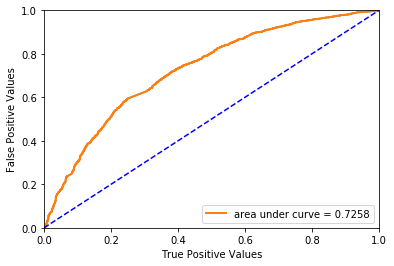

========================For threshold = 3.5===========================


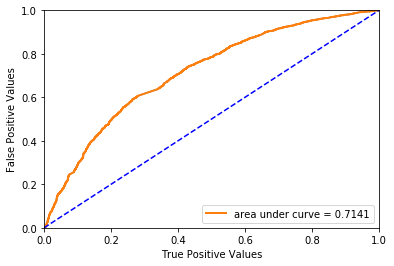

==========================For threshold = 4=============================


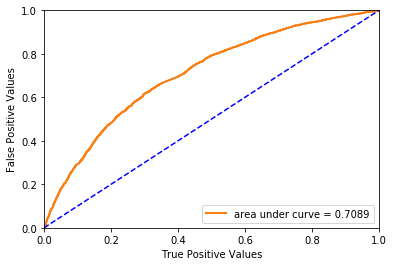

==========================For threshold = 4.5============================


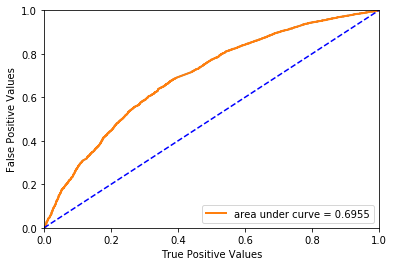

In [11]:
#Question_15
def compute_roc(actual,predicted):
    fpr, tpr, thresholds= roc_curve(actual, predicted)
    aucscore= roc_auc_score(actual, predicted)
    plt.xlabel('True Positive Values')
    plt.ylabel('False Positive Values')
    plt.plot(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label= 'area under curve = %0.4f' % aucscore)
    plt.plot([0, 1], [0, 1],'b--')
    plt.legend(loc = 'lower right')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    return(plt.show())

df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
algo = KNNBasic(k=40, min_k=1,sim_options=sim_options)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 2.5===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=2.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("========================For threshold = 3.5===========================")   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4=============================") 

compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=4)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4.5============================") 
compute_roc(actual_bin,actual_predict)









C:\Users\aadit/ml-latest-small/ratings.csv
For n_factors = 2
RMSE: 1.1874
MAE:  1.0062
RMSE: 1.1811
MAE:  1.0013
RMSE: 1.1733
MAE:  0.9921
RMSE: 1.1745
MAE:  0.9917
RMSE: 1.1831
MAE:  0.9995
RMSE: 1.1875
MAE:  1.0063
RMSE: 1.1693
MAE:  0.9881
RMSE: 1.1878
MAE:  1.0043
RMSE: 1.1723
MAE:  0.9897
RMSE: 1.1673
MAE:  0.9880
For n_factors = 4
RMSE: 1.0613
MAE:  0.8719
RMSE: 1.0625
MAE:  0.8752
RMSE: 1.0615
MAE:  0.8712
RMSE: 1.0607
MAE:  0.8738
RMSE: 1.0698
MAE:  0.8764
RMSE: 1.0781
MAE:  0.8859
RMSE: 1.0718
MAE:  0.8855
RMSE: 1.0797
MAE:  0.8900
RMSE: 1.0618
MAE:  0.8725
RMSE: 1.0701
MAE:  0.8781
For n_factors = 6
RMSE: 1.0142
MAE:  0.8149
RMSE: 1.0163
MAE:  0.8165
RMSE: 0.9995
MAE:  0.8030
RMSE: 1.0075
MAE:  0.8084
RMSE: 1.0126
MAE:  0.8228
RMSE: 1.0140
MAE:  0.8177
RMSE: 0.9944
MAE:  0.8053
RMSE: 1.0052
MAE:  0.8112
RMSE: 1.0203
MAE:  0.8254
RMSE: 1.0139
MAE:  0.8161
For n_factors = 8
RMSE: 0.9774
MAE:  0.7744
RMSE: 0.9855
MAE:  0.7808
RMSE: 0.9751
MAE:  0.7718
RMSE: 0.9798
MAE:  0.7738
R

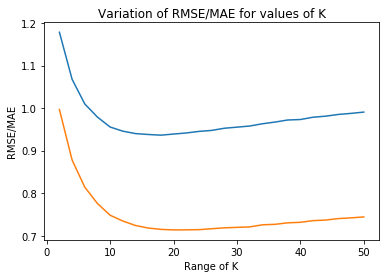

In [132]:
#Question17
file_path = os.path.expanduser('~/ml-latest-small/ratings.csv')
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,52,2),mean_rmse)
plt1.plot(np.arange(2,52,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()
plt1.show()

In [ ]:
#Question 19
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()


In [ ]:
#Question20
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [ ]:
#Question 21
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if (counts1[val[1]]>2 & counts1[val[1]]<=5)
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = NMF(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [ ]:
#Question 22
df1=pd.DataFrame(ratings)
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=.10)
algo = NMF(n_factors=15)
algo.fit(trainset)
predictions = algo.test(testset)

i=0
j=0
k=0
actual=[]
predict=[]
actual_bin=[]

while i<len(predictions):
    actual.append(predictions[i][2])
    i+=1

while j<len(predictions):
    predict.append(predictions[j][3])
    j+=1

actual_array = np.asarray(actual)
actual_predict=np.asarray(predict)

print("========================For threshold = 2.5===============================")
while(k<len(actual_array)):
    if((actual_array[k]>=2.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("========================For threshold = 3.5===========================")   
compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=3.5)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4=============================") 

compute_roc(actual_bin,actual_predict)
k=0
actual_bin=[]
while(k<len(actual_array)):
    if((actual_array[k]>=4)):
       actual_bin.append(1)
    else:
       actual_bin.append(0)
    k=k+1

print("==========================For threshold = 4.5============================") 
compute_roc(actual_bin,actual_predict)

In [62]:
#Question 23
df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
trainset, testset = train_test_split(data, test_size=0.1)
algo = NMF(n_factors=20)
algo.fit(trainset)
U=algo.pu
V=algo.qi
print(type(U))
top_10_movies = [trainset.to_raw_iid(i) for i in np.argsort(V[:,0])[::-1][:10]]
movies = pd.read_csv(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\movies.csv')
G=[]
for movieid in top_10_movies:  print(movies.loc[movies['movieId'] == movieid]['genres'])




#trainset.to_raw_iid
#gives you the movie id
#V is [movie_id x components]
#trainset.to_raw_iid(0) gives you the movie id the first row of V corresponds to
#top_10_movies = [trainset.to_raw_iid(i) for i in np.argsort(V[:,0])[::-1]]
#thats the shortest way
#top_10_movies = [trainset.to_raw_iid(i) for i in np.argsort(V[:,0])[::-1][:10]]

<class 'numpy.ndarray'>
7621    Drama|Romance
Name: genres, dtype: object
251    Drama
Name: genres, dtype: object
8450    Children|Drama|War
Name: genres, dtype: object
3091    Comedy|Documentary
Name: genres, dtype: object
6521    Drama|Fantasy|Romance
Name: genres, dtype: object
6990    Comedy|Drama|Romance
Name: genres, dtype: object
6783    Action|Adventure|Animation|Crime|Fantasy
Name: genres, dtype: object
6729    Comedy
Name: genres, dtype: object
7599    Action|Adventure|Thriller
Name: genres, dtype: object
1966    Horror
Name: genres, dtype: object


In [12]:
#Question 24
#file_path = os.path.expanduser('~/ml-latest-small/ratings.csv')
file_path=(r'C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv')
print(file_path)
# As we're loading a custom dataset, we need to define a reader. In the
# movielens-100k dataset, each line has the following format:
# 'user item rating timestamp', separated by '\t' characters.
reader = Reader(line_format='user item rating timestamp', sep=',', rating_scale=(1, 5), skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

mean=0
mean1=0
mean_rmse=[]
mean_mae=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i,lr_all=0.02)
    print("For n_factors = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        mean=mean+accuracy.rmse(predictions, verbose=True)
        mean1=mean1+accuracy.mae(predictions, verbose=True)
    mean_rmse.append(mean/10)
    mean_mae.append(mean1/10)
    mean=0
    mean1=0
    
plt.plot(np.arange(2,52,2),mean_rmse)
plt1.plot(np.arange(2,52,2),mean_mae)
plt.xlabel('Range of K')
plt.ylabel('RMSE/MAE')
plt.title('Variation of RMSE/MAE for values of K')
plt.show()
plt1.show()


C:\Users\HPC\Dropbox\Homework\Data Mining\HW\HM3\ml-latest-small\ratings.csv
For n_factors = 2
RMSE: 0.9091
MAE:  0.6928
RMSE: 0.8998
MAE:  0.6844


KeyboardInterrupt: 

In [ ]:
#Question 26
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i,lr_all=0.02)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()


In [ ]:
#Question27
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i,lr_all=0.02)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [ ]:
#Question 28
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if (counts1[val[1]]>2 & counts1[val[1]]<=5)
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i,lr_all=0.02)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

In [236]:
#Question 30
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    predict_Y= naive_prediction(testset)
    TRUE_Y = [testset[i][2] for i in range(len(testset))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter) is %0.3f'%rmse_MEAN)


The average RMSE (naive collaborative filter) is 0.913


In [237]:
#Question 31
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]>2]
   return trimmed_data


k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, Popular Movies) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, Popular Movies) is 0.887


In [238]:
#Question 32
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data


k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, Unpopular Movies) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, Unpopular Movies) is 0.973


In [239]:
#Question 33
df = pd.DataFrame({'itemID': list(ratings.movieId), 'userID': list(ratings.userId), 'rating': list(ratings.rating)}) 
avg_rate = df.groupby(['userID'])['rating'].mean().tolist()
def naive_prediction(TEST):
    predictions = [avg_rate[TEST[i][0]-1] for i in range(len(TEST))]
    return predictions

def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

k_rmse = []
kf = KFold(n_splits=10)
data = Dataset.load_from_df(df[['userID', 'itemID', 'rating']], reader)
for trainset, testset in kf.split(data):
    AA=trim(testset)
    predict_Y= naive_prediction(AA)
    TRUE_Y = [AA[i][2] for i in range(len(AA))]
    k_rmse.append(mean_squared_error(TRUE_Y,predict_Y))
rmse_MEAN= np.mean(k_rmse)
print('The average RMSE (naive collaborative filter, High Variance) is %0.3f'%rmse_MEAN)

The average RMSE (naive collaborative filter, High Variance) is 2.040


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

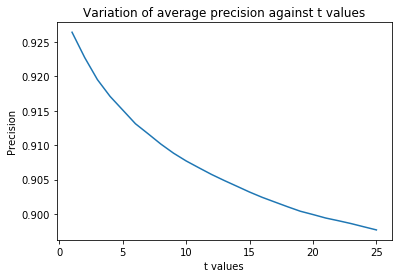

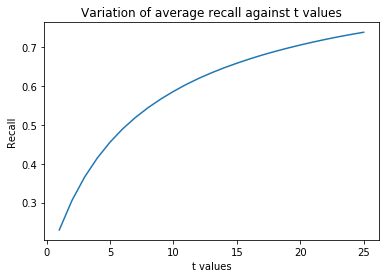

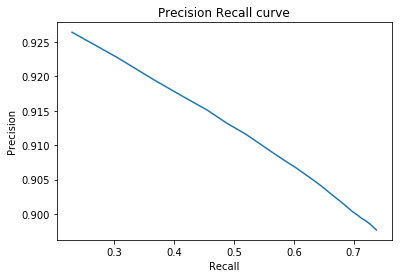

In [33]:
#Question 36

def precision_recall_at_k(predictions, k, threshold):
    '''Return precision and recall at k metrics for each user.'''

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1
    return precisions, recalls

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }

kf = KFold(n_splits=10)
algo = KNNBasic(k=20, min_k=1)
p_knn =[]
r_knn =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_knn.append(pr1)
    r_knn.append(re1)

plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_knn)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_knn)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_knn,p_knn)
plt.show()


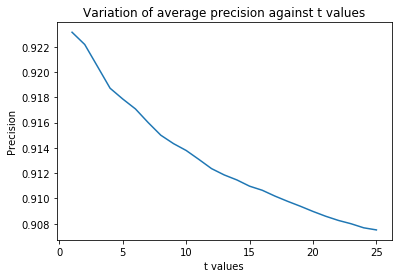

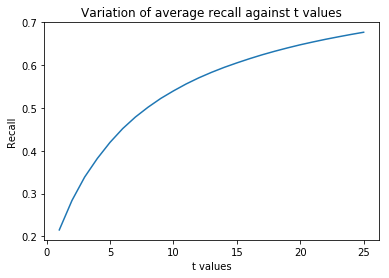

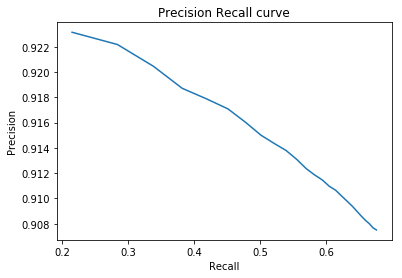

In [20]:
#Question 37

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)

kf = KFold(n_splits=10)
algo = NMF(n_factors= 15)
p_nmf =[]
r_nmf =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_nmf.append(pr1)
    r_nmf.append(re1)
    
plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_nmf)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_nmf)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_nmf,p_nmf)
plt.show()

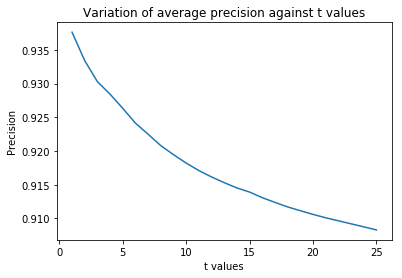

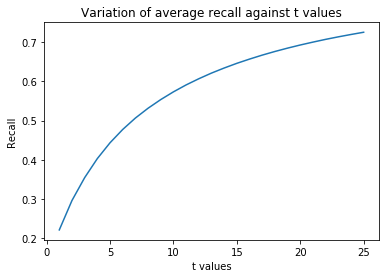

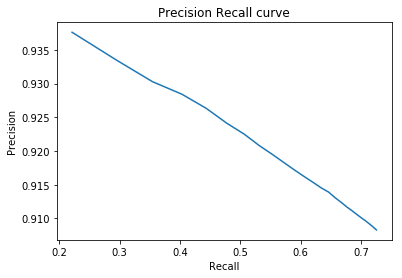

In [35]:
#Question 38

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)

kf = KFold(n_splits=10)
algo = SVD(n_factors=20)
p_svd =[]
r_svd =[]
prec=[]
rec=[]
for t in range(1,26):
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(testset)
        precisions, recalls = precision_recall_at_k(predictions, k=t, threshold = 3)
        prec.append(sum(i for i in precisions.values()) / len(precisions))
        rec.append(sum(rec for rec in recalls.values()) / len(recalls))
    pr1 = np.mean(prec)
    re1 = np.mean(rec)
    p_svd.append(pr1)
    r_svd.append(re1)

plt.xlabel('t values')
plt.ylabel('Precision')
plt.title('Variation of average precision against t values')
plt.plot(np.arange(1,26,1),p_svd)
plt.show()

plt.xlabel('t values')
plt.ylabel('Recall')
plt.title('Variation of average recall against t values')
plt.plot(np.arange(1,26,1),r_svd)
plt.show()

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall curve')
plt.plot(r_svd,p_svd)
plt.show()


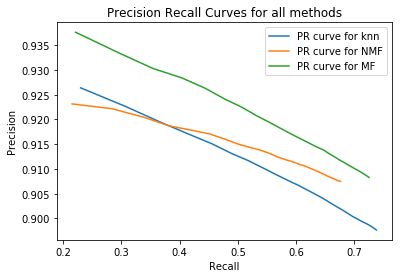

In [44]:
#Question 39
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curves for all methods')
line1 = plt.plot(r_knn,p_knn, label="Line 1")
line2 = plt.plot(r_nmf,p_nmf, label="Line 2")
line3 = plt.plot(r_svd,p_svd, label="Line 3")
ax = plt.gca()
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["PR curve for knn","PR curve for NMF","PR curve for MF"] )
plt.show()

For n_factors = 2
For k value = 2
RMSE: 0.9187
RMSE: 0.9394
RMSE: 0.9621
RMSE: 0.9335
RMSE: 0.9292
RMSE: 0.9495
RMSE: 0.9350
RMSE: 0.9376
RMSE: 0.9174
RMSE: 0.9264
For n_factors = 4
For k value = 4
RMSE: 0.9411
RMSE: 0.9334
RMSE: 0.9294
RMSE: 0.9449
RMSE: 0.9263
RMSE: 0.9478
RMSE: 0.9380
RMSE: 0.9296
RMSE: 0.9481
RMSE: 0.9278
For n_factors = 6
For k value = 6
RMSE: 0.9397
RMSE: 0.9195
RMSE: 0.9159
RMSE: 0.9298
RMSE: 0.9311
RMSE: 0.9515
RMSE: 0.9502
RMSE: 0.9620
RMSE: 0.9344
RMSE: 0.9096
For n_factors = 8
For k value = 8
RMSE: 0.9335
RMSE: 0.9480
RMSE: 0.9279
RMSE: 0.9296
RMSE: 0.9358
RMSE: 0.9421
RMSE: 0.9571
RMSE: 0.9340
RMSE: 0.9131
RMSE: 0.9417
For n_factors = 10
For k value = 10
RMSE: 0.9427
RMSE: 0.9274
RMSE: 0.9167
RMSE: 0.9295
RMSE: 0.9273
RMSE: 0.9297
RMSE: 0.9486
RMSE: 0.9395
RMSE: 0.9649
RMSE: 0.9462
For n_factors = 12
For k value = 12
RMSE: 0.9367
RMSE: 0.9125
RMSE: 0.9286
RMSE: 0.9383
RMSE: 0.9308
RMSE: 0.9217
RMSE: 0.9441
RMSE: 0.9400
RMSE: 0.9602
RMSE: 0.9474
For n_factor

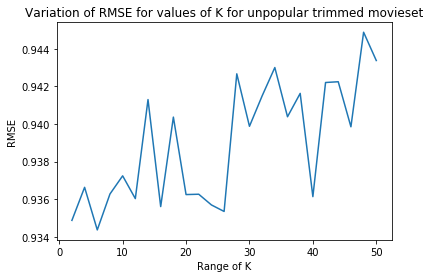

In [42]:
#Question27
def trim(ratings):
   counts1=Counter([val[1] for val in ratings])
   trimmed_data=[val for val in ratings if counts1[val[1]]<=2]
   return trimmed_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for unpopular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()

For n_factors = 2
For k value = 2
RMSE: 1.4135
RMSE: 1.4168
RMSE: 1.4424
RMSE: 1.4225
RMSE: 1.4755
RMSE: 1.4775
RMSE: 1.4964
RMSE: 1.4199
RMSE: 1.3909
RMSE: 1.4548
For n_factors = 4
For k value = 4
RMSE: 1.4649
RMSE: 1.4543
RMSE: 1.4660
RMSE: 1.4779
RMSE: 1.5001
RMSE: 1.5146
RMSE: 1.4667
RMSE: 1.4105
RMSE: 1.4410
RMSE: 1.5153
For n_factors = 6
For k value = 6
RMSE: 1.5591
RMSE: 1.4474
RMSE: 1.5493
RMSE: 1.5188
RMSE: 1.5351
RMSE: 1.4150
RMSE: 1.3530
RMSE: 1.4485
RMSE: 1.4599
RMSE: 1.3854
For n_factors = 8
For k value = 8
RMSE: 1.3977
RMSE: 1.4567
RMSE: 1.4745
RMSE: 1.2819
RMSE: 1.3392
RMSE: 1.4718
RMSE: 1.4875
RMSE: 1.4197
RMSE: 1.4853
RMSE: 1.4916
For n_factors = 10
For k value = 10
RMSE: 1.4326
RMSE: 1.3812
RMSE: 1.3733
RMSE: 1.4954
RMSE: 1.4812
RMSE: 1.3525
RMSE: 1.4010
RMSE: 1.4770
RMSE: 1.4589
RMSE: 1.3482
For n_factors = 12
For k value = 12
RMSE: 1.4648
RMSE: 1.4457
RMSE: 1.5249
RMSE: 1.3895
RMSE: 1.4232
RMSE: 1.4234
RMSE: 1.3960
RMSE: 1.4452
RMSE: 1.3258
RMSE: 1.4769
For n_factor

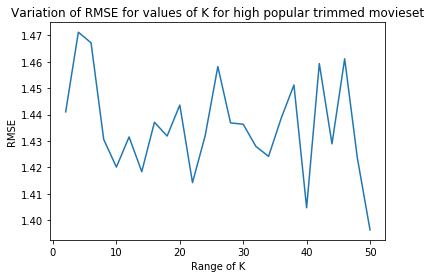

In [45]:
#Question 28
def trim(data):
    movie_rating = defaultdict(list)
    for val in data:
        movie_rating[val[1]].append(val[2])
    trim_data = [val for val in data if len(movie_rating[val[1]]) >= 5 and np.var(movie_rating[val[1]]) >= 2.0]
    return trim_data

df1=pd.DataFrame(ratings)
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df1[['userId', 'movieId', 'rating']], reader)
sim_options = {'name': 'pearson'  # compute  similarities between items
               }
mean=0
mean_rmse=[]
kf = KFold(n_splits=10)
for i in np.arange(2,52,2):
    algo = SVD(n_factors=i)
    print("For n_factors = " + str(i))
    print("For k value = " + str(i))
    for trainset, testset in kf.split(data):
        algo.fit(trainset)
        predictions = algo.test(trim(testset))
        mean=mean+accuracy.rmse(predictions, verbose=True)
    mean_rmse.append(mean/10)
    #print(mean_rmse)
    mean=0
plt.xlabel('Range of K')
plt.ylabel('RMSE')
plt.title('Variation of RMSE for values of K for high popular trimmed movieset')
plt.plot(np.arange(2,52,2),mean_rmse)
plt.show()